In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("reviews.csv")
data = df[df['rating'] < 3]
data

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
7,100002528,beli-harddisk-eksternal,nurfarida,1,NaN,ada pengirimn ntb bima,bima,4,4,0,True,7.22,NaN,androidApp,2019-10-02
8,100003785,beli-harddisk-eksternal,Fadjar B.,1,NaN,NaN,baru 10 bulan layarnya dah bergaris,0,0,0,True,21.49,06 Apr 2017,androidApp,2019-10-02
11,100004132,beli-harddisk-eksternal,Lazada Guest,1,NaN,Ini cicil pake apa?,"Mau tanya ini cicilnya pake apa ya,cc bkn?",7,7,0,True,14.88,NaN,androidApp,2019-10-02
13,100004505,beli-harddisk-eksternal,Andry M.,1,NaN,Pesanan tidak tepat waktu,Pengirim barang tidak sesuai janji. Katanya ex...,1,1,0,True,31.51,18 Mei 2018,mobile,2019-10-02
15,100004505,beli-harddisk-eksternal,Lazada Guest,1,NaN,Cara mendapatkan garansi,Bagaimana tv LED saya merek Sharp 24 hitam LC ...,14,14,0,True,22.67,NaN,mobile-app,2019-10-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203742,7939218,shop-televisi-digital,Lazada Customer,1,NaN,NaN,NaN,0,0,0,True,14.99,14 Des 2017,androidApp,2019-10-02
203751,8656947,shop-televisi-digital,Lazada Guest,2,NaN,Pliss klau bisa harga nya di kurangilah,Harga kurang memuaskan,1,1,0,True,12.00,NaN,mobile-app,2019-10-02
203776,9467887,shop-televisi-digital,Umalida,1,NaN,Harga tidak sesuai,"Hrga 2,6jt v giliran di pesan muncul Pembayara...",12,12,1,True,14.79,NaN,androidApp,2019-10-02
203779,9467887,shop-televisi-digital,Lazada Guest,1,NaN,Nanda,Kalo kirim ke kupang bisa gak?,0,0,1,True,10.35,NaN,mobile-app,2019-10-02


#### Preprocessing

Membersihkan data yang NaNN atau bolong,,dan memberikan kondisi untuk data yang di ambil rating hanya 2, 
rating 1 dan rating 2,,sisa nya tidak di pakek,,mengambil baris dari 0 - 70

In [44]:
data.isna().sum()
dataCleaning = data[['reviewContent', 'rating']].dropna()

dataSimpan = dataCleaning[dataCleaning['rating'] < 3][0:70]
dataSimpan

,reviewContent,rating
7,bima,1
8,baru 10 bulan layarnya dah bergaris,1
11,"Mau tanya ini cicilnya pake apa ya,cc bkn?",1
13,Pengirim barang tidak sesuai janji. Katanya ex...,1
15,Bagaimana tv LED saya merek Sharp 24 hitam LC ...,1
...,...,...
851,.,2
863,Sya mau kembaliin produk TV ichico by yg kmrn ...,1
865,USB nya cm pormalitas doang gx bs d gunakn,1
866,Knapa pesanan sayadi batalkan??,1


In [45]:
print('Total Jumlah SMS:', dataSimpan.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- [0] SMS Normal\t:', dataSimpan[dataSimpan.rating == 1].shape[0], 'data')
print('-- [1] Fraud / Penipuan\t:', dataSimpan[dataSimpan.rating == 2].shape[0], 'data')
# print('-- [2] Promo\t\t:', data[data.label == 2].shape[0], 'data\n')

Total Jumlah SMS: 70 data

terdiri dari (label):
-- [0] SMS Normal	: 55 data
-- [1] Fraud / Penipuan	: 15 data


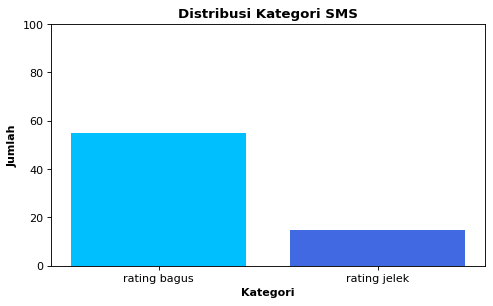

In [48]:
height = dataSimpan['rating'].value_counts()
labels = ('rating bagus', 'rating jelek')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,100)
plt.title('Distribusi Kategori SMS', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue', 'skyblue'])
plt.xticks(y_pos, labels)
plt.show()

berdarsarkan dari grafik,,terlihat bahwa lebih banyak customer yang memberikan rating bagus dari pada rating yang tidak bagus

In [49]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()
  return text

In [50]:
raw_sample = dataSimpan['reviewContent'].iloc[3]
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('Case folding\t: ', case_folding)

Raw data	:  Pengirim barang tidak sesuai janji. Katanya express 1 hari. Dari hari jumat barang sampai hari rabu. SeMoga barangnya awet saja.
Case folding	:  pengirim barang tidak sesuai janji katanya express  hari dari hari jumat barang sampai hari rabu semoga barangnya awet saja


In [32]:
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

--2022-03-30 20:19:21--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv’

key_norm.csv        100%[===================>]  79,07K  92,0KB/s    in 0,9s    

2022-03-30 20:19:24 (92,0 KB/s) - ‘key_norm.csv’ saved [80969/80969]



In [51]:
key_norm = pd.read_csv('key_norm.csv')

def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

In [52]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [53]:
more_stopword = [1]                    # Tambahkan kata dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

In [54]:
raw_sample = dataSimpan['reviewContent'].iloc[3]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)

Raw data		:  Pengirim barang tidak sesuai janji. Katanya express 1 hari. Dari hari jumat barang sampai hari rabu. SeMoga barangnya awet saja.
Case folding		:  pengirim barang tidak sesuai janji katanya express  hari dari hari jumat barang sampai hari rabu semoga barangnya awet saja
Stopword removal	:  pengirim barang sesuai janji express jumat barang rabu semoga barangnya awet


In [55]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [56]:
raw_sample = dataSimpan['reviewContent'].iloc[3]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  Pengirim barang tidak sesuai janji. Katanya express 1 hari. Dari hari jumat barang sampai hari rabu. SeMoga barangnya awet saja.
Case folding		:  pengirim barang tidak sesuai janji katanya express  hari dari hari jumat barang sampai hari rabu semoga barangnya awet saja
Stopword removal	:  pengirim barang sesuai janji express jumat barang rabu semoga barangnya awet
Stemming		:  kirim barang sesuai janji express jumat barang rabu moga barang awet


In [57]:
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [58]:
dataSimpan['clean_teks'] = dataSimpan['reviewContent'].apply(text_preprocessing_process)

In [59]:
dataSimpan

,reviewContent,rating,clean_teks
7,bima,1,bima
8,baru 10 bulan layarnya dah bergaris,1,layar gar
11,"Mau tanya ini cicilnya pake apa ya,cc bkn?",1,cicil pakai yacc
13,Pengirim barang tidak sesuai janji. Katanya ex...,1,kirim barang sesuai janji express jumat barang...
15,Bagaimana tv LED saya merek Sharp 24 hitam LC ...,1,televisi led merek sharp hitam lc lei mati tot...
...,...,...,...
851,.,2,
863,Sya mau kembaliin produk TV ichico by yg kmrn ...,1,kembaliin produk televisi ichico by kemarin ps...
865,USB nya cm pormalitas doang gx bs d gunakn,1,usb nya cm pormalitas d gunakn
866,Knapa pesanan sayadi batalkan??,1,pesan sayadi batal


In [60]:
dataSimpan.to_csv('clean_data.csv')

In [61]:
X = dataSimpan['clean_teks']
y = dataSimpan['rating']

In [62]:
X

7                                                   bima
8                                              layar gar
11                                      cicil pakai yacc
13     kirim barang sesuai janji express jumat barang...
15     televisi led merek sharp hitam lc lei mati tot...
                             ...                        
851                                                     
863    kembaliin produk televisi ichico by kemarin ps...
865                       usb nya cm pormalitas d gunakn
866                                   pesan sayadi batal
867    kecewa banget sih tranfer batalin barang nya s...
Name: clean_teks, Length: 70, dtype: object

In [63]:
y

7      1
8      1
11     1
13     1
15     1
      ..
851    2
863    1
865    1
866    1
867    1
Name: rating, Length: 70, dtype: int64

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

# BoW - Unigram
vec = CountVectorizer(ngram_range=(1,1))
vec.fit(X)

CountVectorizer()

In [65]:
# Melihat Jumlah Fitur
print(len(vec.get_feature_names_out()))

320


In [66]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(vec.get_feature_names_out())

['aceh' 'adaada' 'alamat' 'alesan' 'alhamdulillah' 'ambil' 'amin' 'an'
 'anak' 'apa' 'april' 'aqua' 'aquanya' 'aryo' 'asalasalan' 'aturany'
 'awet' 'baca' 'bad' 'bagus' 'bagusss' 'banget' 'bangetbarang' 'bantu'
 'barang' 'barangny' 'barng' 'batal' 'batalin' 'bayar' 'bebarengan'
 'bekas' 'beli' 'bener' 'beneran' 'berhatihati' 'berkah' 'bersih' 'biar'
 'bijak' 'bilang' 'bima' 'biru' 'blitar' 'bnyakkk' 'bohong' 'bom' 'bonus'
 'br' 'braket' 'braketnya' 'buat' 'buka' 'bukasaya' 'bungkus' 'by'
 'cantum' 'capek' 'catat' 'cek' 'cepat' 'cicil' 'cicilanmaksudnya' 'cm'
 'coba' 'cobra' 'copy' 'core' 'corrupt' 'cranya' 'crashed' 'cs' 'curiga'
 'daerah' 'dapet' 'data' 'daur' 'deh' 'deskripsi' 'dicancel' 'dicopy'
 'dijabotabek' 'dikirm' 'dinyalain' 'disiniparah' 'diwilanda' 'diwilyah'
 'dosa' 'dtulis' 'duit' 'dus' 'dvb' 'eeeeellllaaaa' 'ekspedisi' 'email'
 'emang' 'error' 'etalase' 'express' 'fd' 'fdmengecewakan' 'file' 'film'
 'firusss' 'fisik' 'flashdisk' 'flashdisknya' 'flashdrivemohon' 'free'
 'f

In [67]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_unigram = vec.transform(X).toarray()

X_unigram

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [68]:
data_unigram = pd.DataFrame(X_unigram, columns=vec.get_feature_names_out())
data_unigram

,aceh,adaada,alamat,alesan,alhamdulillah,ambil,amin,an,anak,apa,...,usaha,usb,utama,utara,virus,warna,ya,yacc,yah,yapersyaratan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
68,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(X)

X_tf_idf = tf_idf.transform(X)

In [70]:
# Melihat Jumlah Fitur
print(len(tf_idf.get_feature_names_out()))

320


In [71]:
print(tf_idf.get_feature_names_out())

['aceh' 'adaada' 'alamat' 'alesan' 'alhamdulillah' 'ambil' 'amin' 'an'
 'anak' 'apa' 'april' 'aqua' 'aquanya' 'aryo' 'asalasalan' 'aturany'
 'awet' 'baca' 'bad' 'bagus' 'bagusss' 'banget' 'bangetbarang' 'bantu'
 'barang' 'barangny' 'barng' 'batal' 'batalin' 'bayar' 'bebarengan'
 'bekas' 'beli' 'bener' 'beneran' 'berhatihati' 'berkah' 'bersih' 'biar'
 'bijak' 'bilang' 'bima' 'biru' 'blitar' 'bnyakkk' 'bohong' 'bom' 'bonus'
 'br' 'braket' 'braketnya' 'buat' 'buka' 'bukasaya' 'bungkus' 'by'
 'cantum' 'capek' 'catat' 'cek' 'cepat' 'cicil' 'cicilanmaksudnya' 'cm'
 'coba' 'cobra' 'copy' 'core' 'corrupt' 'cranya' 'crashed' 'cs' 'curiga'
 'daerah' 'dapet' 'data' 'daur' 'deh' 'deskripsi' 'dicancel' 'dicopy'
 'dijabotabek' 'dikirm' 'dinyalain' 'disiniparah' 'diwilanda' 'diwilyah'
 'dosa' 'dtulis' 'duit' 'dus' 'dvb' 'eeeeellllaaaa' 'ekspedisi' 'email'
 'emang' 'error' 'etalase' 'express' 'fd' 'fdmengecewakan' 'file' 'film'
 'firusss' 'fisik' 'flashdisk' 'flashdisknya' 'flashdrivemohon' 'free'
 'f

In [72]:
# Melihat matriks jumlah token menggunakan TF IDF, lihat perbedaannya dengan metode BoW
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_tf_idf = tf_idf.transform(X).toarray()

X_tf_idf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.67889634, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [73]:
data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,aceh,adaada,alamat,alesan,alhamdulillah,ambil,amin,an,anak,apa,...,usaha,usb,utama,utara,virus,warna,ya,yacc,yah,yapersyaratan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.678896,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.422295,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [74]:
# Mengubah nilai data tabular tf-idf menjadi array agar dapat dijalankan pada proses seleksi fitur
X = np.array(data_tf_idf)
y = np.array(y)

In [80]:

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

# Ten features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k=300) 
X_kbest_features = chi2_features.fit_transform(X, y) 
  
# Reduced features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 320
Reduced feature number: 300


In [81]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,0.050228
1,0.050228
2,0.128998
3,0.096602
4,0.157142
...,...
315,0.216571
316,0.068410
317,0.185154
318,0.234163


In [82]:
# Menampilkan fitur beserta nilainya
feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,0.050228,aceh
1,0.050228,adaada
2,0.128998,alamat
3,0.096602,alesan
4,0.157142,alhamdulillah
...,...,...
315,0.216571,warna
316,0.068410,ya
317,0.185154,yacc
318,0.234163,yah


In [83]:
# Mengurutkan fitur terbaik
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
174,3.847940,kualitas
207,3.666667,muas
283,3.641486,tanggal
163,3.430056,kirim
111,3.170761,gambar
...,...,...
227,0.029517,pas
288,0.024207,terima
285,0.024019,televisi
257,0.004399,rusak


In [84]:
# Menampilkan mask pada feature yang diseleksi
# False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask = chi2_features.get_support()
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [85]:
# Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi pada Chi-Square
new_feature = []
for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature
selected_feature

['aceh',
 'adaada',
 'alamat',
 'alesan',
 'alhamdulillah',
 'ambil',
 'amin',
 'an',
 'anak',
 'april',
 'aqua',
 'aquanya',
 'asalasalan',
 'aturany',
 'awet',
 'baca',
 'bad',
 'bagus',
 'bagusss',
 'banget',
 'bangetbarang',
 'bantu',
 'barang',
 'barangny',
 'barng',
 'batal',
 'batalin',
 'bayar',
 'bebarengan',
 'beli',
 'bener',
 'berhatihati',
 'berkah',
 'bersih',
 'biar',
 'bijak',
 'bilang',
 'bima',
 'biru',
 'blitar',
 'bnyakkk',
 'bohong',
 'bom',
 'bonus',
 'br',
 'braket',
 'braketnya',
 'buat',
 'buka',
 'bukasaya',
 'bungkus',
 'by',
 'cantum',
 'capek',
 'catat',
 'cepat',
 'cicil',
 'cicilanmaksudnya',
 'cm',
 'coba',
 'cobra',
 'copy',
 'core',
 'corrupt',
 'cranya',
 'crashed',
 'cs',
 'daerah',
 'dapet',
 'data',
 'daur',
 'deh',
 'deskripsi',
 'dicancel',
 'dicopy',
 'dijabotabek',
 'dikirm',
 'dinyalain',
 'disiniparah',
 'diwilanda',
 'diwilyah',
 'dosa',
 'dtulis',
 'duit',
 'dus',
 'dvb',
 'ekspedisi',
 'email',
 'emang',
 'error',
 'etalase',
 'express',
 

In [86]:
# Menampilkan fitur-fitur yang sudah diseleksi 
# Beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning

# Hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,aceh,adaada,alamat,alesan,alhamdulillah,ambil,amin,an,anak,april,...,untung,usaha,utama,utara,virus,warna,ya,yacc,yah,yapersyaratan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.678896,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
